In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cardio_train.csv', sep=';')  # Note: sep is ";" not ","
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Shape of the dataset
print("Shape:", df.shape)

# Columns and data types
print("\nInfo:")
df.info()

# First few rows
df.head()


Shape: (70000, 13)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# Convert age from days to years
df['age_years'] = (df['age'] / 365).astype(int)

# Check the new column
df[['age', 'age_years']].head()


,age,age_years
0,18393,50
1,20228,55
2,18857,51
3,17623,48
4,17474,47


In [7]:
df.describe(include='all')


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,52.840671
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.766774
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [8]:
# Check for missing values
df.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64

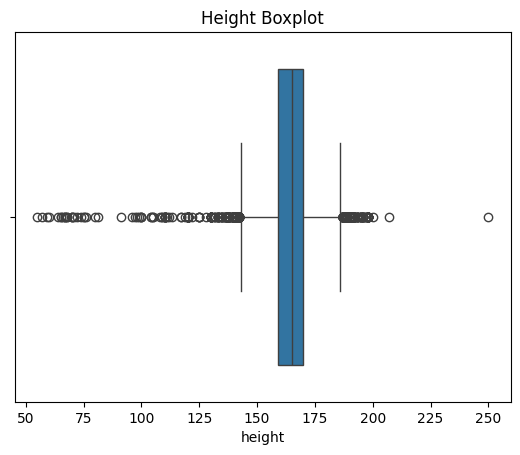

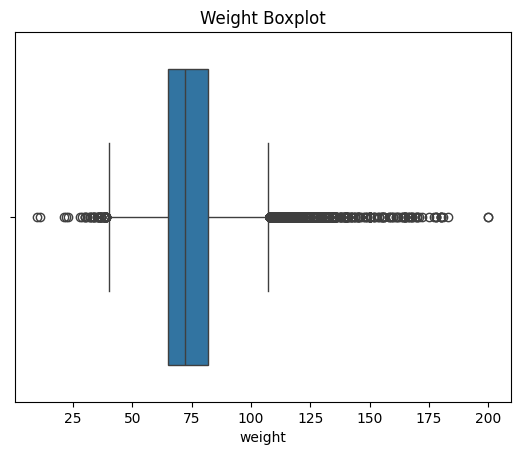

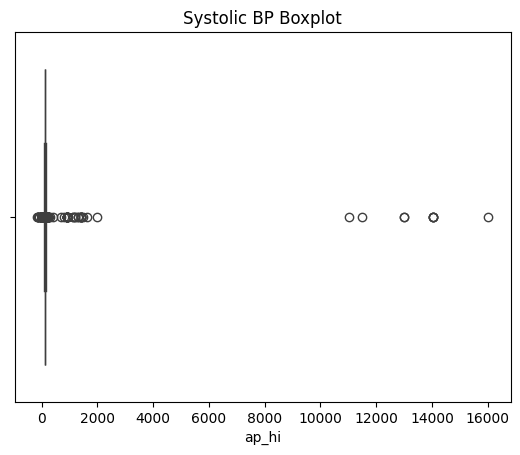

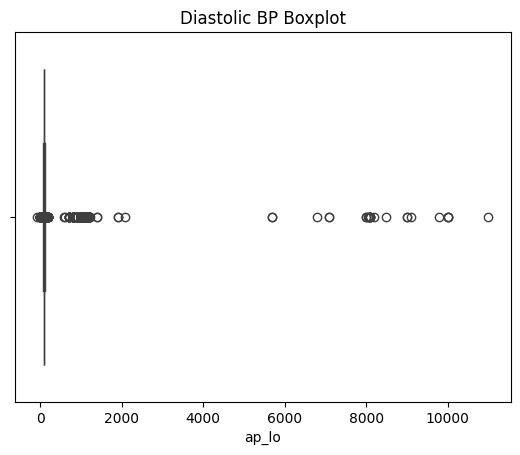

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Height
sns.boxplot(x=df['height'])
plt.title("Height Boxplot")
plt.show()

# Weight
sns.boxplot(x=df['weight'])
plt.title("Weight Boxplot")
plt.show()

# Blood Pressure
sns.boxplot(x=df['ap_hi'])
plt.title("Systolic BP Boxplot")
plt.show()

sns.boxplot(x=df['ap_lo'])
plt.title("Diastolic BP Boxplot")
plt.show()


In [10]:
# Count invalid values
print("Negative ap_hi:", (df['ap_hi'] < 0).sum())
print("Very high ap_hi (>250):", (df['ap_hi'] > 250).sum())

print("Negative ap_lo:", (df['ap_lo'] < 0).sum())
print("Very high ap_lo (>200):", (df['ap_lo'] > 200).sum())

print("Unusually short height (<100):", (df['height'] < 100).sum())
print("Unusually low weight (<30):", (df['weight'] < 30).sum())


Negative ap_hi: 7
Very high ap_hi (>250): 40
Negative ap_lo: 1
Very high ap_lo (>200): 953
Unusually short height (<100): 29
Unusually low weight (<30): 7


In [12]:
df = df[(df['ap_hi'] > 0) & (df['ap_lo'] > 0)]


In [13]:
df = df[(df['ap_hi'] <= 250) & (df['ap_lo'] <= 200)]


In [14]:
df = df[df['height'] >= 100]
df = df[df['weight'] >= 30]
print(df.shape)
df.describe()


(68950, 14)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,68950.000000,68950.000000,68950.000000,68950.000000,68950.000000,68950.000000,68950.000000,68950.000000,68950.000000,68950.000000,68950.000000,68950.000000,68950.000000,68950.000000
mean,49967.843495,19463.939072,1.348658,164.398202,74.120883,126.330138,81.352110,1.364482,1.225961,0.087846,0.053590,0.803292,0.494938,52.827092
std,28848.879737,2468.025843,0.476549,7.985030,14.304151,17.689339,9.801947,0.678753,0.571905,0.283073,0.225208,0.397512,0.499978,6.768957
min,0.000000,10798.000000,1.000000,100.000000,30.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,24996.250000,17657.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50011.000000,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74861.750000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


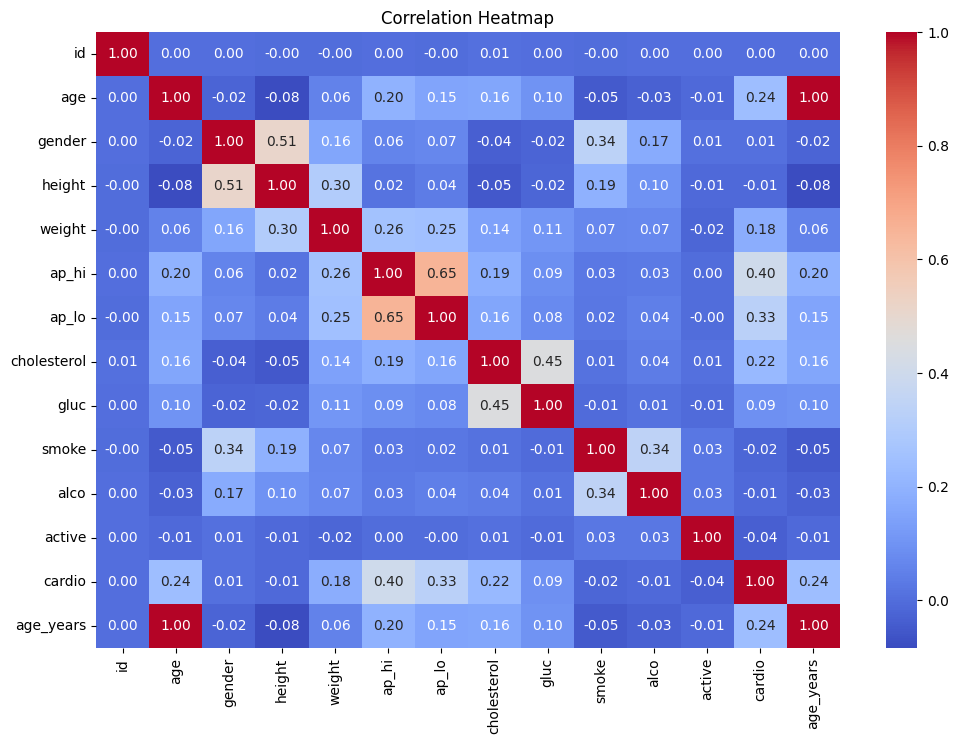

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [24]:
df.groupby('gender')['cardio'].value_counts(normalize=True)


gender  cardio
1       0         0.507860
        1         0.492140
2       1         0.500166
        0         0.499834
Name: proportion, dtype: float64

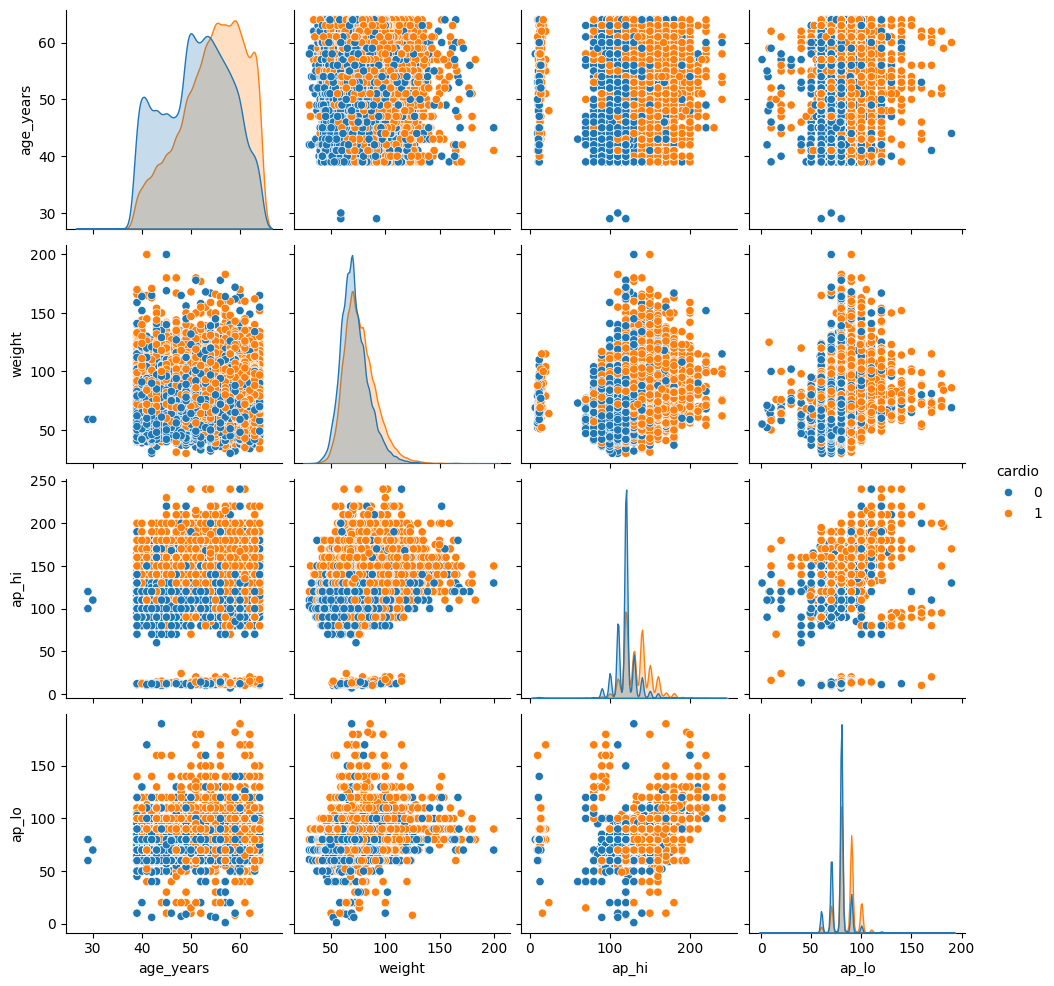

In [25]:
import seaborn as sns
sns.pairplot(df[['age_years', 'weight', 'ap_hi', 'ap_lo', 'cardio']], hue='cardio')



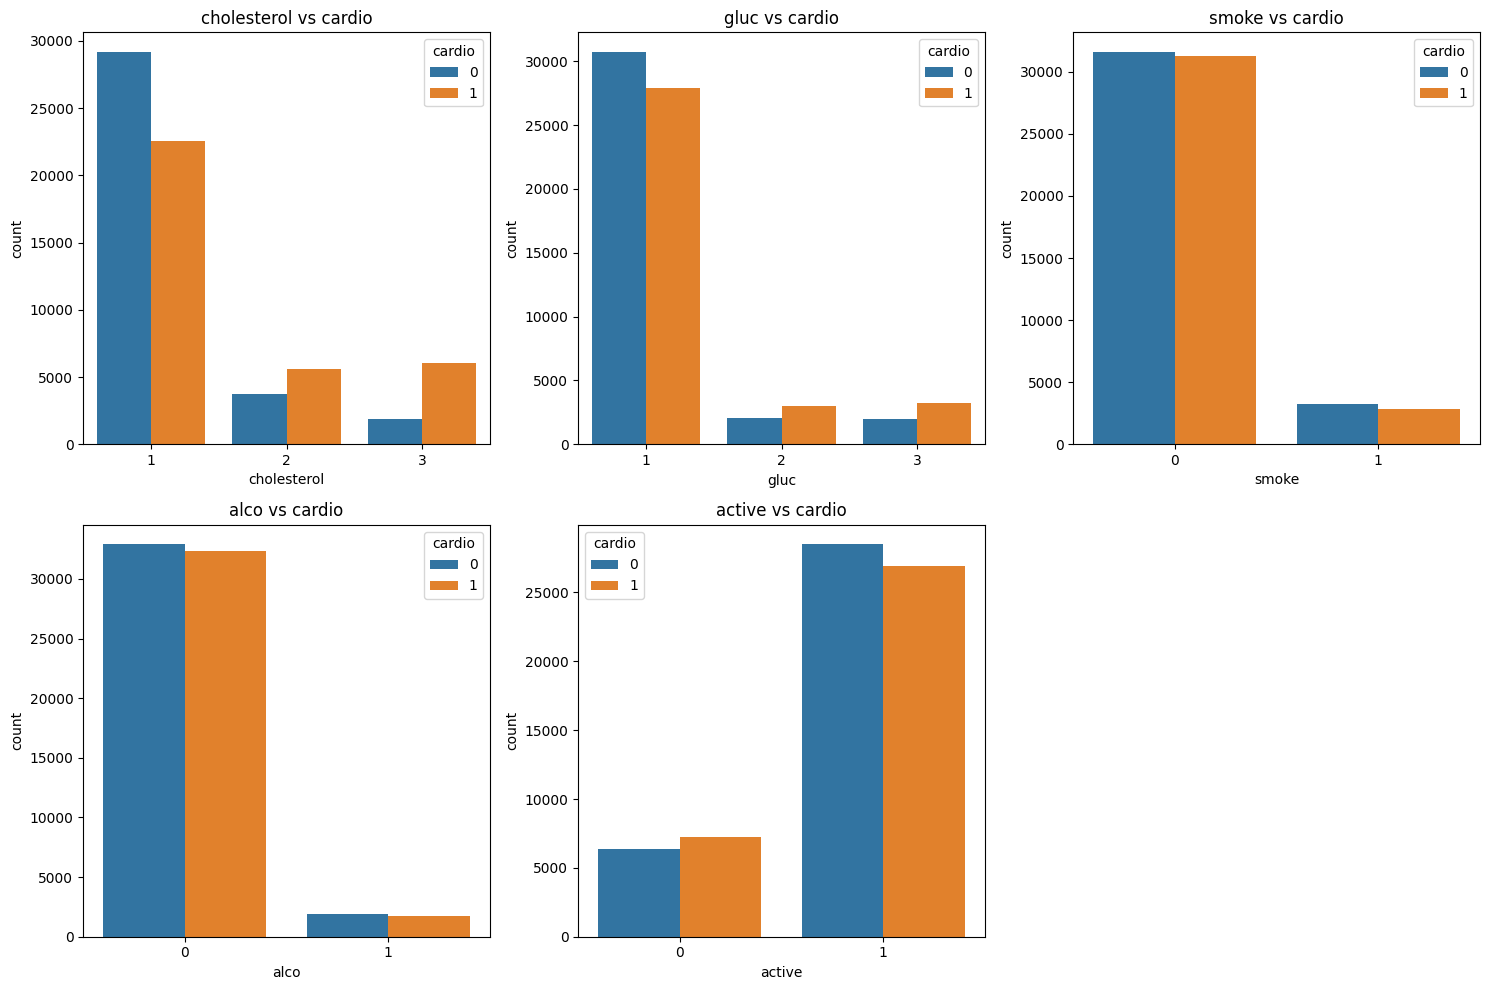

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col, hue='cardio')
    plt.title(f'{col} vs cardio')
plt.tight_layout()
plt.show()


C:\Users\Mg\AppData\Local\Temp\ipykernel_12296\3364995262.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cardio_stats = df.groupby('age_group')['cardio'].value_counts(normalize=True).unstack()


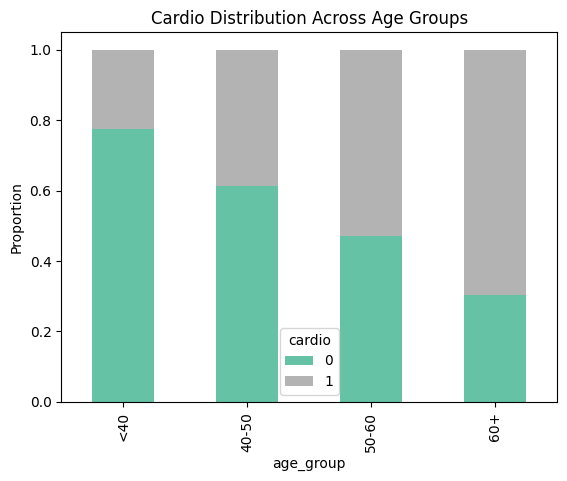

In [27]:
# Create age bins
bins = [0, 40, 50, 60, 100]
labels = ['<40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['age_years'], bins=bins, labels=labels)

# Group by age group and calculate % with cardio disease
age_cardio_stats = df.groupby('age_group')['cardio'].value_counts(normalize=True).unstack()
age_cardio_stats.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Cardio Distribution Across Age Groups")
plt.ylabel("Proportion")
plt.show()


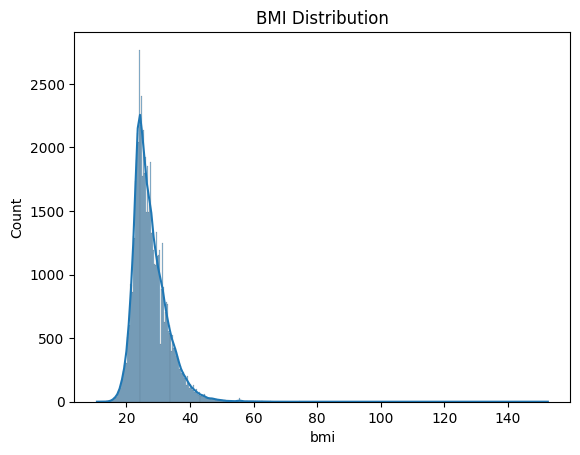

In [28]:
# Convert height to meters before squaring
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Optional: check distribution
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()


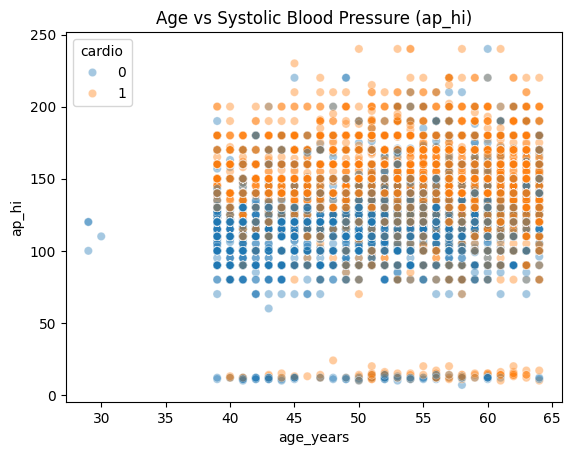

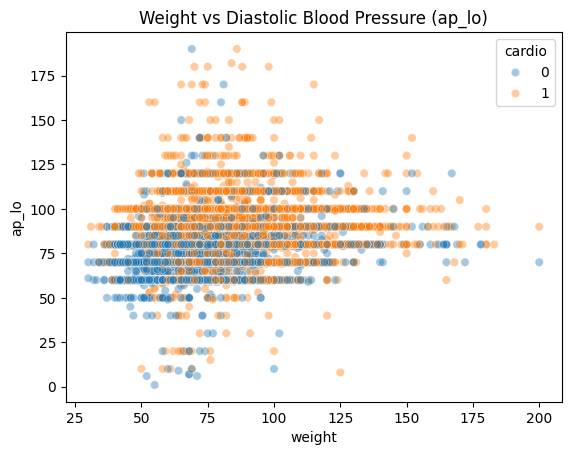

In [29]:
# Age vs Systolic BP
sns.scatterplot(data=df, x='age_years', y='ap_hi', hue='cardio', alpha=0.4)
plt.title('Age vs Systolic Blood Pressure (ap_hi)')
plt.show()

# Weight vs Diastolic BP
sns.scatterplot(data=df, x='weight', y='ap_lo', hue='cardio', alpha=0.4)
plt.title('Weight vs Diastolic Blood Pressure (ap_lo)')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['cardio', 'id'])  # Remove target + unnecessary 'id'
y = df['cardio']  # Target column

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (55160, 12)
Testing set shape: (13790, 12)


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Split your features and labels
X = df.drop(columns=['cardio', 'id'])
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# 4. Predict and evaluate
y_pred = logreg.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      6965
           1       0.74      0.66      0.70      6825

    accuracy                           0.72     13790
   macro avg       0.72      0.72      0.72     13790
weighted avg       0.72      0.72      0.72     13790

Confusion Matrix:
 [[5378 1587]
 [2292 4533]]


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.7080493110949964

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72      6965
           1       0.71      0.69      0.70      6825

    accuracy                           0.71     13790
   macro avg       0.71      0.71      0.71     13790
weighted avg       0.71      0.71      0.71     13790


Confusion Matrix:
 [[5067 1898]
 [2128 4697]]


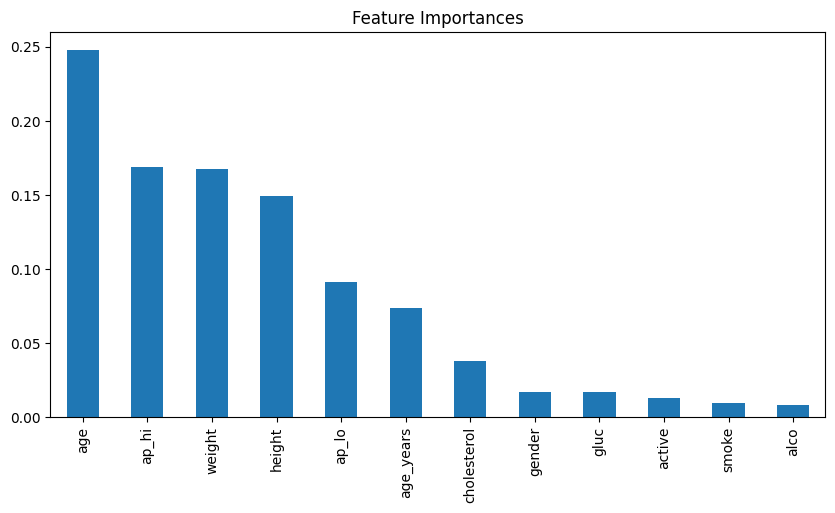

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Feature Importances')
plt.show()


In [36]:
import pandas as pd

# Load your original dataset
df = pd.read_csv('cardio_train.csv', sep=';')

# Drop 'id' if it exists
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Convert age from days to years
df['age_years'] = (df['age'] / 365).astype(int)

# Add BMI column: weight (kg) / height (m)^2
df['height_m'] = df['height'] / 100
df['BMI'] = df['weight'] / (df['height_m'] ** 2)
df.drop(columns='height_m', inplace=True)

# Create age bins
df['age_bin'] = pd.cut(df['age_years'],
                       bins=[0, 40, 50, 60, 100],
                       labels=['<40', '40-50', '50-60', '60+'])

# Save cleaned dataset
df.to_csv('cardio_cleaned.csv', index=False)
print("✅ Saved as cardio_cleaned.csv")


✅ Saved as cardio_cleaned.csv


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib
import pandas as pd
# Load the cleaned data
df = pd.read_csv('cardio_cleaned.csv')

# Define features and target
X = df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
        'cholesterol', 'gluc', 'smoke', 'alco', 'active']]

y = df['cardio']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(model, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Saved model as logistic_model.pkl and scaler as scaler.pkl")
print(X.columns.tolist())


✅ Saved model as logistic_model.pkl and scaler as scaler.pkl
['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
